In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from google.colab.patches import cv2_imshow # this for only colab usage

from PIL import Image

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist

from tensorflow.math import confusion_matrix


**Loading The Data From keras.datasets

In [53]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [ ]:
type(X_train)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

Trainnig data = 60,000

Testing data = 10,000

Images Dimensions = 28 * 28

Grayscale image ---> 1 chanel

In [ ]:
# printing particular image
print(X_train[10])

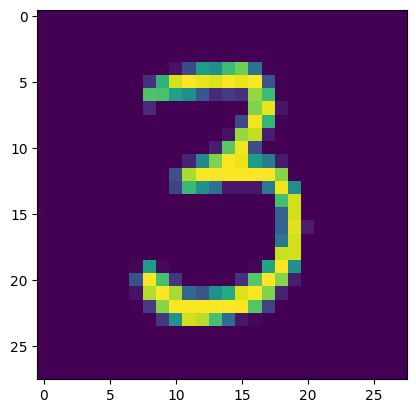

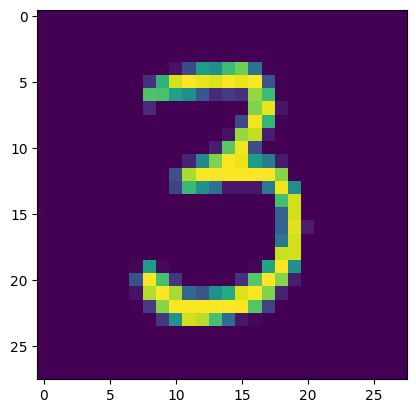

3
3


In [57]:
plt.imshow(X_train[50])
plt.show()
print(Y_train[50])

Images Labels

In [58]:
# unique values
print(np.unique(Y_train))
print(np.unique(Y_test))


 - We can use this value as it is or use One Hot Encoder

- No need to resize the images as they are all have same dimensions (28 * 28)

- Scaling the data

In [59]:
X_train = X_train/255
X_test = X_test/255

# Scaling only for feauters (X_train , X_test)

In [ ]:
print(X_train[10])

**Building Neural Network**

In [ ]:
# setting up the layres for Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation='sigmoid') # 10 for number of value categories (from 0 to 9) in this project

])

In [ ]:
# compoling the Neural Network
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [63]:
# training the Neural Network
model.fit(X_train, Y_train, epochs=10 )

Epoch 1/10
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8433 - loss: 0.5294
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8433 - loss: 0.5294
Epoch 2/10
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9551 - loss: 0.1514
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9551 - loss: 0.1514
Epoch 3/10
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9677 - loss: 0.1087
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9677 - loss: 0.1087
Epoch 4/10
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9746 - loss: 0.0857
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9746 - loss: 0.0857
Epoch 5/10
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9800 - loss: 0.0695
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9800 - loss: 0.0695
Epoch 6/10
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9834 - loss: 0.0574
1875/1875 ━━━━━━━━━

**Accuracy on Test Data**

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'\033[92mColored Model Acuuracy is: {accuracy:>.2%}')

In [ ]:
# Show first point in X_test
plt.imshow(X_test[0])

In [ ]:
Y_pred  = model.predict(X_test)

In [ ]:
print(Y_pred.shape)

In [ ]:
print(Y_pred[0])

model.predict() give the prediction probability for each class for that data point

In [ ]:
# converting the prediction probability to class label
label_first_img = np.argmax(Y_pred[0])
print(label_first_img)

output 7 represent the 7th value in point prediction values

In [ ]:
# onverting the prediction probability to class label for all test data points
Y_pred_labels= [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

#**Confusion Metrix**

In [ ]:
conf_metrix =confusion_matrix(Y_test, Y_pred_labels)
print(conf_metrix)

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_metrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predict Label')

#**Building Predictive System**

In [ ]:
input_image_path = '/content/MNIST_digit.png'

In [ ]:
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

In [ ]:
print(input_image)

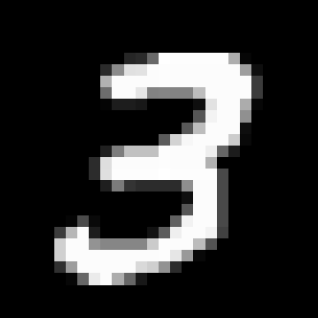

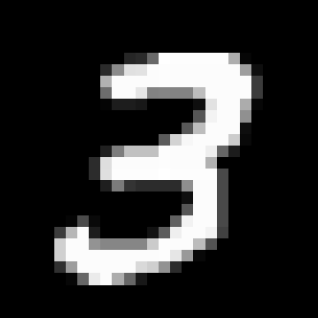

In [77]:
cv2_imshow(input_image)

In [78]:
input_image.shape

(318, 318, 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
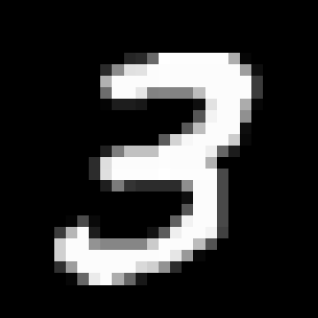

In [79]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale

In [80]:
grayscale.shape

(318, 318)

(318, 318)

In [81]:
resized_image = cv2.resize(grayscale, (28,28))

In [82]:
resized_image.shape

(28, 28)

(28, 28)

In [83]:
cv2_imshow(resized_image)

In [84]:
resized_image_scaled = resized_image/255

In [85]:
reshaped_image = np.reshape(resized_image_scaled,[1, 28, 28])

In [86]:
input_prediction = model.predict(reshaped_image)
print(reshaped_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         

In [ ]:
input_shape_label = np.argmax(input_prediction)

In [51]:
print(input_shape_label)

3
3


**Combine All in one cell for predictive system**

Image to be predicted: /content/MNIST_digit.png


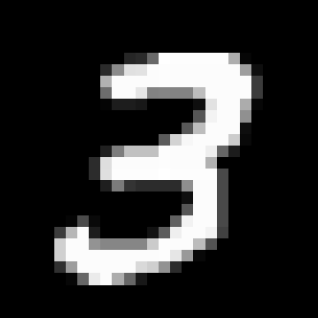

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The Handwriting is recognised as :  3


In [50]:
input_image_path = input('Image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

resized_image = cv2.resize(grayscale, (28,28))

resized_image_scaled = resized_image/255 # scaled image

reshaped_image = np.reshape(resized_image_scaled,[1, 28, 28])

input_prediction = model.predict(reshaped_image)
input_shape_label = np.argmax(input_prediction)


print('The Handwriting is recognised as : ',input_shape_label)

